In [1]:
import pandas as pd
# Read the CSV file
df_movies_keywords = pd.read_csv(r"data/keywords.csv")
df_movies_keywords = df_movies_keywords.drop_duplicates(subset='id')
df_movies_keywords['id'] = df_movies_keywords['id'].astype(str)
df_movies_keywords

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


In [2]:
# Read the CSV file
train_df = pd.read_csv(r"data/topic_model_train.csv")
train_df

,Unnamed: 0,id,overview,release_date,runtime,tagline,title,vote_average,vote_count,budget_adj,...,Italy,Russia,Japan,Other Country,quarter_1,quarter_2,quarter_3,quarter_4,total_popular_cast,top_director
0,1882,11507.0,After losing an acting role and his girlfriend...,1984-10-25,114.0,You can't believe everything you see.,Body Double,6.4,138.0,5.208150e+07,...,0,0,0,1,0.0,0.0,0.0,1.0,0,1
1,1017,106.0,Dutch and his group of commandos are hired by ...,1987-06-11,107.0,"If it bleeds, we can kill it...",Predator,7.3,2129.0,7.849182e+07,...,0,0,0,1,0.0,1.0,0.0,0.0,1,1
2,927,10400.0,"The story of Rubin ""Hurricane"" Carter, a boxer...",1999-09-17,146.0,His greatest fight was for justice.,The Hurricane,7.2,401.0,9.570920e+07,...,0,0,0,1,0.0,0.0,1.0,0.0,0,0
3,1614,10894.0,Psychological horror about a lonely young woma...,2002-01-13,93.0,Be Careful... She Just Might Take Your Heart.,May,6.3,153.0,8.659342e+05,...,0,0,0,1,1.0,0.0,0.0,0.0,0,0
4,4833,434119.0,When a crime organization from North Korea cro...,2017-01-18,125.0,NaN,Confidential Assignment,6.2,5.0,8.727888e+06,...,0,0,0,1,1.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,357,655.0,A man wanders out of the desert not knowing wh...,1984-05-19,147.0,A place for dreams. A place for heartbreak. A ...,"Paris, Texas",7.7,282.0,9.098450e+06,...,0,0,0,1,0.0,1.0,0.0,0.0,0,0
3388,470,11831.0,"In 1839, the slave ship Amistad set sail from ...",1997-12-03,155.0,Freedom is not given. It is our right at birth...,Amistad,6.8,324.0,7.462679e+07,...,0,0,0,1,0.0,0.0,0.0,1.0,0,1
3389,4148,167073.0,"In 1950s Ireland and New York, young Ellis Lac...",2015-10-20,111.0,"Two countries, two loves, one heart",Brooklyn,7.2,1235.0,1.169366e+07,...,0,0,0,1,0.0,0.0,0.0,1.0,0,0
3390,884,21610.0,An international terrorist has New York in a g...,1981-03-17,99.0,A terrorist holds New York in a grip of fear -...,Nighthawks,6.4,87.0,3.371079e+07,...,0,0,0,1,1.0,0.0,0.0,0.0,0,0


In [3]:
train_df['id'] = train_df['id'].astype(int).astype(str)
train_df

,Unnamed: 0,id,overview,release_date,runtime,tagline,title,vote_average,vote_count,budget_adj,...,Italy,Russia,Japan,Other Country,quarter_1,quarter_2,quarter_3,quarter_4,total_popular_cast,top_director
0,1882,11507,After losing an acting role and his girlfriend...,1984-10-25,114.0,You can't believe everything you see.,Body Double,6.4,138.0,5.208150e+07,...,0,0,0,1,0.0,0.0,0.0,1.0,0,1
1,1017,106,Dutch and his group of commandos are hired by ...,1987-06-11,107.0,"If it bleeds, we can kill it...",Predator,7.3,2129.0,7.849182e+07,...,0,0,0,1,0.0,1.0,0.0,0.0,1,1
2,927,10400,"The story of Rubin ""Hurricane"" Carter, a boxer...",1999-09-17,146.0,His greatest fight was for justice.,The Hurricane,7.2,401.0,9.570920e+07,...,0,0,0,1,0.0,0.0,1.0,0.0,0,0
3,1614,10894,Psychological horror about a lonely young woma...,2002-01-13,93.0,Be Careful... She Just Might Take Your Heart.,May,6.3,153.0,8.659342e+05,...,0,0,0,1,1.0,0.0,0.0,0.0,0,0
4,4833,434119,When a crime organization from North Korea cro...,2017-01-18,125.0,NaN,Confidential Assignment,6.2,5.0,8.727888e+06,...,0,0,0,1,1.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,357,655,A man wanders out of the desert not knowing wh...,1984-05-19,147.0,A place for dreams. A place for heartbreak. A ...,"Paris, Texas",7.7,282.0,9.098450e+06,...,0,0,0,1,0.0,1.0,0.0,0.0,0,0
3388,470,11831,"In 1839, the slave ship Amistad set sail from ...",1997-12-03,155.0,Freedom is not given. It is our right at birth...,Amistad,6.8,324.0,7.462679e+07,...,0,0,0,1,0.0,0.0,0.0,1.0,0,1
3389,4148,167073,"In 1950s Ireland and New York, young Ellis Lac...",2015-10-20,111.0,"Two countries, two loves, one heart",Brooklyn,7.2,1235.0,1.169366e+07,...,0,0,0,1,0.0,0.0,0.0,1.0,0,0
3390,884,21610,An international terrorist has New York in a g...,1981-03-17,99.0,A terrorist holds New York in a grip of fear -...,Nighthawks,6.4,87.0,3.371079e+07,...,0,0,0,1,1.0,0.0,0.0,0.0,0,0


In [24]:
train_df = pd.merge(train_df,df_movies_keywords, how='left', left_on='id', right_on='id')
train_df

,Unnamed: 0,id,overview,release_date,runtime,tagline,title,vote_average,vote_count,budget_adj,...,Russia,Japan,Other Country,quarter_1,quarter_2,quarter_3,quarter_4,total_popular_cast,top_director,keywords
0,1882,11507,After losing an acting role and his girlfriend...,1984-10-25,114.0,You can't believe everything you see.,Body Double,6.4,138.0,5.208150e+07,...,0,0,1,0.0,0.0,0.0,1.0,0,1,"[{'id': 293, 'name': 'female nudity'}, {'id': ..."
1,1017,106,Dutch and his group of commandos are hired by ...,1987-06-11,107.0,"If it bleeds, we can kill it...",Predator,7.3,2129.0,7.849182e+07,...,0,0,1,0.0,1.0,0.0,0.0,1,1,"[{'id': 1291, 'name': 'central and south ameri..."
2,927,10400,"The story of Rubin ""Hurricane"" Carter, a boxer...",1999-09-17,146.0,His greatest fight was for justice.,The Hurricane,7.2,401.0,9.570920e+07,...,0,0,1,0.0,0.0,1.0,0.0,0,0,"[{'id': 378, 'name': 'prison'}, {'id': 2792, '..."
3,1614,10894,Psychological horror about a lonely young woma...,2002-01-13,93.0,Be Careful... She Just Might Take Your Heart.,May,6.3,153.0,8.659342e+05,...,0,0,1,1.0,0.0,0.0,0.0,0,0,"[{'id': 2467, 'name': 'difficult childhood'}, ..."
4,4833,434119,When a crime organization from North Korea cro...,2017-01-18,125.0,NaN,Confidential Assignment,6.2,5.0,8.727888e+06,...,0,0,1,1.0,0.0,0.0,0.0,0,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,357,655,A man wanders out of the desert not knowing wh...,1984-05-19,147.0,A place for dreams. A place for heartbreak. A ...,"Paris, Texas",7.7,282.0,9.098450e+06,...,0,0,1,0.0,1.0,0.0,0.0,0,0,"[{'id': 380, 'name': 'brother brother relation..."
3388,470,11831,"In 1839, the slave ship Amistad set sail from ...",1997-12-03,155.0,Freedom is not given. It is our right at birth...,Amistad,6.8,324.0,7.462679e+07,...,0,0,1,0.0,0.0,0.0,1.0,0,1,"[{'id': 701, 'name': 'cuba'}, {'id': 1860, 'na..."
3389,4148,167073,"In 1950s Ireland and New York, young Ellis Lac...",2015-10-20,111.0,"Two countries, two loves, one heart",Brooklyn,7.2,1235.0,1.169366e+07,...,0,0,1,0.0,0.0,0.0,1.0,0,0,"[{'id': 128, 'name': 'love triangle'}, {'id': ..."
3390,884,21610,An international terrorist has New York in a g...,1981-03-17,99.0,A terrorist holds New York in a grip of fear -...,Nighthawks,6.4,87.0,3.371079e+07,...,0,0,1,1.0,0.0,0.0,0.0,0,0,[]


In [25]:
# Extract the 'name' values from the strings
train_df['keywords_names'] = train_df['keywords'].astype(str).apply(lambda x: [entry.split(":")[1].strip().strip("'").rstrip("'}") for entry in x.strip("[]").split(",") if "'name':" in entry])

train_df['keywords_names'] = train_df['keywords_names'].apply(lambda x: ', '.join(x))

train_df['text_concat'] = train_df['title'].fillna('') + train_df['overview'].fillna('') + train_df['tagline'].fillna('') + " " + train_df['keywords_names'].fillna('')
train_df

,Unnamed: 0,id,overview,release_date,runtime,tagline,title,vote_average,vote_count,budget_adj,...,Other Country,quarter_1,quarter_2,quarter_3,quarter_4,total_popular_cast,top_director,keywords,keywords_names,text_concat
0,1882,11507,After losing an acting role and his girlfriend...,1984-10-25,114.0,You can't believe everything you see.,Body Double,6.4,138.0,5.208150e+07,...,1,0.0,0.0,0.0,1.0,0,1,"[{'id': 293, 'name': 'female nudity'}, {'id': ...","female nudity, pornography, claustrophobia, nu...",Body DoubleAfter losing an acting role and his...
1,1017,106,Dutch and his group of commandos are hired by ...,1987-06-11,107.0,"If it bleeds, we can kill it...",Predator,7.3,2129.0,7.849182e+07,...,1,0.0,1.0,0.0,0.0,1,1,"[{'id': 1291, 'name': 'central and south ameri...","central and south america, predator, alien, st...",PredatorDutch and his group of commandos are h...
2,927,10400,"The story of Rubin ""Hurricane"" Carter, a boxer...",1999-09-17,146.0,His greatest fight was for justice.,The Hurricane,7.2,401.0,9.570920e+07,...,1,0.0,0.0,1.0,0.0,0,0,"[{'id': 378, 'name': 'prison'}, {'id': 2792, '...","prison, boxer, boxing match, boxing school, bi...","The HurricaneThe story of Rubin ""Hurricane"" Ca..."
3,1614,10894,Psychological horror about a lonely young woma...,2002-01-13,93.0,Be Careful... She Just Might Take Your Heart.,May,6.3,153.0,8.659342e+05,...,1,1.0,0.0,0.0,0.0,0,0,"[{'id': 2467, 'name': 'difficult childhood'}, ...","difficult childhood, psychoterror, murder, lon...",MayPsychological horror about a lonely young w...
4,4833,434119,When a crime organization from North Korea cro...,2017-01-18,125.0,NaN,Confidential Assignment,6.2,5.0,8.727888e+06,...,1,1.0,0.0,0.0,0.0,0,0,[],,Confidential AssignmentWhen a crime organizati...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,357,655,A man wanders out of the desert not knowing wh...,1984-05-19,147.0,A place for dreams. A place for heartbreak. A ...,"Paris, Texas",7.7,282.0,9.098450e+06,...,1,0.0,1.0,0.0,0.0,0,0,"[{'id': 380, 'name': 'brother brother relation...","brother brother relationship, regret, texas, p...","Paris, TexasA man wanders out of the desert no..."
3388,470,11831,"In 1839, the slave ship Amistad set sail from ...",1997-12-03,155.0,Freedom is not given. It is our right at birth...,Amistad,6.8,324.0,7.462679e+07,...,1,0.0,0.0,0.0,1.0,0,1,"[{'id': 701, 'name': 'cuba'}, {'id': 1860, 'na...","cuba, mutiny, slavery, sentence, historical fi...","AmistadIn 1839, the slave ship Amistad set sai..."
3389,4148,167073,"In 1950s Ireland and New York, young Ellis Lac...",2015-10-20,111.0,"Two countries, two loves, one heart",Brooklyn,7.2,1235.0,1.169366e+07,...,1,0.0,0.0,0.0,1.0,0,0,"[{'id': 128, 'name': 'love triangle'}, {'id': ...","love triangle, based on novel, homesickness, v...","BrooklynIn 1950s Ireland and New York, young E..."
3390,884,21610,An international terrorist has New York in a g...,1981-03-17,99.0,A terrorist holds New York in a grip of fear -...,Nighthawks,6.4,87.0,3.371079e+07,...,1,1.0,0.0,0.0,0.0,0,0,[],,NighthawksAn international terrorist has New Y...


In [26]:
# Load the regular expression library
import re
# Remove punctuation
train_df['text_processed'] = \
train_df['text_concat'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
train_df['text_processed'] = \
train_df['text_processed'].map(lambda x: x.lower())

print(train_df['text_processed'].head(1).values[0])
# Print out the first rows of train_df
train_df['text_processed'].head()

body doubleafter losing an acting role and his girlfriend jake scully finally catches a break: he gets offered a gig house-sitting in the hollywood hills while peering through the beautiful home's telescope one night he spies a gorgeous blonde dancing in her window but when he witnesses the girl's murder it leads scully through the netherworld of the adult entertainment industry on a search for answers -- with porn actress holly body as his guideyou can't believe everything you see female nudity pornography claustrophobia nudity witness police movie in movie murder neighbor los angeles peeping tom porn actress struggling actor voyeurism actor


0    body doubleafter losing an acting role and his...
1    predatordutch and his group of commandos are h...
2    the hurricanethe story of rubin "hurricane" ca...
3    maypsychological horror about a lonely young w...
4    confidential assignmentwhen a crime organizati...
Name: text_processed, dtype: object

# Data preparation for topic modeling

In [122]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 
                   'ten', 'love', 'family', 'director', 'film', 'story', 'relationship', 'girl', 'boy', 'women', 'men', 'woman', 'man', 'life', 'friend', 'movie',
                   'father', 'mother', 'child', 'world', 'year', 'time'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
#def make_trigrams(texts):
    #return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN']): #'ADJ','ADV'
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

data = train_df.text_processed.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[0])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Elton\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['body', 'doubleafter', 'losing', 'an', 'acting', 'role', 'and', 'his', 'girlfriend', 'jake', 'scully', 'finally', 'catches', 'break', 'he', 'gets', 'offered', 'gig', 'house', 'sitting', 'in', 'the', 'hollywood', 'hills', 'while', 'peering', 'through', 'the', 'beautiful', 'home', 'telescope', 'one', 'night', 'he', 'spies', 'gorgeous', 'blonde', 'dancing', 'in', 'her', 'window', 'but', 'when', 'he', 'witnesses', 'the', 'girl', 'murder', 'it', 'leads', 'scully', 'through', 'the', 'netherworld', 'of', 'the', 'adult', 'entertainment', 'industry', 'on', 'search', 'for', 'answers', 'with', 'porn', 'actress', 'holly', 'body', 'as', 'his', 'guideyou', 'can', 'believe', 'everything', 'you', 'see', 'female', 'nudity', 'pornography', 'claustrophobia', 'nudity', 'witness', 'police', 'movie', 'in', 'movie', 'murder', 'neighbor', 'los', 'angeles', 'peeping', 'tom', 'porn', 'actress', 'struggling', 'actor', 'voyeurism', 'actor']


In [123]:
# spacy for lemmatization
import spacy

# Do lemmatization
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN'])
data_lemmatized = lemmatization(data_words)
data_lemmatized

D:\Annaconda\Annaconda\lib\site-packages\spacy\language.py:1895: UserWarning: [W123] Argument disable with value ['parser', 'ner'] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(


[['body',
  'doubleafter',
  'role',
  'girlfriend',
  'gig',
  'house',
  'hollywood',
  'hill',
  'home',
  'telescope',
  'night',
  'dancing',
  'window',
  'girl',
  'murder',
  'netherworld',
  'adult',
  'entertainment',
  'industry',
  'search',
  'answer',
  'porn',
  'actress',
  'body',
  'guideyou',
  'nudity',
  'claustrophobia',
  'nudity',
  'witness',
  'police',
  'movie',
  'movie',
  'murder',
  'neighbor',
  'porn',
  'actress',
  'actor',
  'voyeurism',
  'actor'],
 ['group',
  'commando',
  'airman',
  'guerilla',
  'jungle',
  'mission',
  'forest',
  'trophy',
  'body',
  'victim',
  'eye',
  'audience',
  'hunter',
  'sport',
  'timeif',
  'commando'],
 ['story',
  'boxer',
  'murder',
  'people',
  'fight',
  'fight',
  'prison',
  'boxing',
  'match',
  'school',
  'biography'],
 ['horror',
  'woman',
  'childhood',
  'attempt',
  'people',
  'heart',
  'childhood',
  'psychoterror',
  'murder',
  'loneliness',
  'artificial'],
 ['crime',
  'organization',
  

In [124]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_lemmatized, min_count=5, threshold=100)
#trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
#trigram_mod = gensim.models.phrases.Phraser(trigram)
print(bigram_mod[data_lemmatized[0]])

['body', 'doubleafter', 'role', 'girlfriend', 'gig', 'house', 'hollywood', 'hill', 'home', 'telescope', 'night', 'dancing', 'window', 'girl', 'murder', 'netherworld', 'adult', 'entertainment', 'industry', 'search', 'answer', 'porn', 'actress', 'body', 'guideyou', 'nudity', 'claustrophobia', 'nudity', 'witness', 'police', 'movie', 'movie', 'murder', 'neighbor', 'porn', 'actress', 'actor', 'voyeurism', 'actor']


In [125]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_lemmatized)
data_words_bigrams

[['body',
  'doubleafter',
  'role',
  'girlfriend',
  'gig',
  'house',
  'hollywood',
  'hill',
  'home',
  'telescope',
  'night',
  'dancing',
  'window',
  'girl',
  'murder',
  'netherworld',
  'adult',
  'entertainment',
  'industry',
  'search',
  'answer',
  'porn',
  'actress',
  'body',
  'guideyou',
  'nudity',
  'claustrophobia',
  'nudity',
  'witness',
  'police',
  'movie',
  'movie',
  'murder',
  'neighbor',
  'porn',
  'actress',
  'actor',
  'voyeurism',
  'actor'],
 ['group',
  'commando',
  'airman',
  'guerilla',
  'jungle',
  'mission',
  'forest',
  'trophy',
  'body',
  'victim',
  'eye',
  'audience',
  'hunter',
  'sport',
  'timeif',
  'commando'],
 ['story',
  'boxer',
  'murder',
  'people',
  'fight',
  'fight',
  'prison',
  'boxing',
  'match',
  'school',
  'biography'],
 ['horror',
  'woman',
  'childhood',
  'attempt',
  'people',
  'heart',
  'childhood',
  'psychoterror',
  'murder',
  'loneliness',
  'artificial'],
 ['crime',
  'organization',
  

In [126]:
# remove stop words
data_words_nostop = remove_stopwords(data_words_bigrams)
data_words_nostop

[['body',
  'doubleafter',
  'role',
  'girlfriend',
  'gig',
  'house',
  'hollywood',
  'hill',
  'home',
  'telescope',
  'night',
  'dancing',
  'window',
  'murder',
  'netherworld',
  'adult',
  'entertainment',
  'industry',
  'search',
  'answer',
  'porn',
  'actress',
  'body',
  'guideyou',
  'nudity',
  'claustrophobia',
  'nudity',
  'witness',
  'police',
  'murder',
  'neighbor',
  'porn',
  'actress',
  'actor',
  'voyeurism',
  'actor'],
 ['group',
  'commando',
  'airman',
  'guerilla',
  'jungle',
  'mission',
  'forest',
  'trophy',
  'body',
  'victim',
  'eye',
  'audience',
  'hunter',
  'sport',
  'timeif',
  'commando'],
 ['boxer',
  'murder',
  'people',
  'fight',
  'fight',
  'prison',
  'boxing',
  'match',
  'school',
  'biography'],
 ['horror',
  'childhood',
  'attempt',
  'people',
  'heart',
  'childhood',
  'psychoterror',
  'murder',
  'loneliness',
  'artificial'],
 ['crime',
  'organization',
  'crosse',
  'border',
  'soil',
  'detective',
  'dete

In [127]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words_nostop)
# Create Corpus
texts = data_words_nostop
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 2), (1, 2), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


# GSDMM topic modeling

In [82]:
from gsdmm import MovieGroupProcess
mgp = MovieGroupProcess(K=10, alpha=0.01, beta=0.1, n_iters=30)

In [83]:
n_terms = len(data_words_nostop)
n_terms

3392

In [84]:
y = mgp.fit(data_words_nostop, n_terms)

In stage 0: transferred 2636 clusters with 10 clusters populated
In stage 1: transferred 1455 clusters with 10 clusters populated
In stage 2: transferred 1050 clusters with 10 clusters populated
In stage 3: transferred 800 clusters with 10 clusters populated
In stage 4: transferred 659 clusters with 10 clusters populated
In stage 5: transferred 592 clusters with 10 clusters populated
In stage 6: transferred 516 clusters with 10 clusters populated
In stage 7: transferred 501 clusters with 10 clusters populated
In stage 8: transferred 455 clusters with 10 clusters populated
In stage 9: transferred 440 clusters with 10 clusters populated
In stage 10: transferred 429 clusters with 10 clusters populated
In stage 11: transferred 386 clusters with 10 clusters populated
In stage 12: transferred 410 clusters with 10 clusters populated
In stage 13: transferred 368 clusters with 10 clusters populated
In stage 14: transferred 393 clusters with 10 clusters populated
In stage 15: transferred 382 clu

In [85]:
import numpy as np
doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topic :', doc_count)

Number of documents per topic : [467 258 289 409 278 311 412 318 359 291]


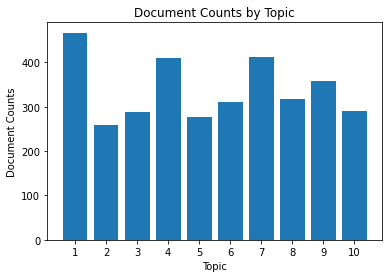

In [138]:
import matplotlib.pyplot as plt


# Create x-axis indices based on the length of the data
x = range(1,len(doc_count)+1)

# Plot the bar chart
plt.bar(x, doc_count)

# Add labels and title
plt.xlabel('Topic')
plt.ylabel('Document Counts')
plt.title('Document Counts by Topic')
# Set x-axis ticks with interval 1
plt.xticks(range(1,len(doc_count)+1), x)

# Display the chart
plt.show()

In [86]:
top_index = doc_count.argsort()[-15:][::-1]
print('Most important clusters (by number of docs inside):', top_index)

Most important clusters (by number of docs inside): [0 6 3 8 7 5 9 2 4 1]


In [87]:
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts =sorted(mgp.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print('Cluster %s : %s'%(cluster,sort_dicts))
        print('-'*120)

In [88]:
# Show the top 10 words in term frequency for each cluster 
top_words(mgp.cluster_word_distribution, top_index, 10)

Cluster 0 : [('murder', 196), ('killer', 151), ('police', 90), ('death', 82), ('agent', 79), ('violence', 59), ('wife', 54), ('revenge', 52), ('crime', 51), ('detective', 51)]
------------------------------------------------------------------------------------------------------------------------
Cluster 6 : [('wife', 69), ('parent', 69), ('wedding', 68), ('sister', 64), ('day', 54), ('comedy', 53), ('daughter', 53), ('son', 52), ('couple', 47), ('night', 44)]
------------------------------------------------------------------------------------------------------------------------
Cluster 3 : [('school', 136), ('music', 88), ('sex', 77), ('nudity', 69), ('comedy', 52), ('star', 47), ('night', 45), ('band', 40), ('student', 40), ('singer', 40)]
------------------------------------------------------------------------------------------------------------------------
Cluster 8 : [('war', 106), ('battle', 56), ('vampire', 54), ('soldier', 52), ('death', 51), ('century', 43), ('day', 39), ('hero

In [89]:
# Import the wordcloud library
from wordcloud import WordCloud


def create_wordcloud_1(keyword_list, topic):
    text = {word: value for word, value in keyword_list}
    print(text)
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic" + " "+ str(topic+1))
    plt.show()
    


[('murder', 196), ('killer', 151), ('police', 90), ('death', 82), ('agent', 79), ('violence', 59), ('wife', 54), ('revenge', 52), ('crime', 51), ('detective', 51), ('cop', 48), ('car', 45), ('victim', 44), ('daughter', 42), ('son', 42), ('town', 40), ('brother', 38), ('investigation', 38), ('identity', 37), ('thief', 35)]
{'murder': 196, 'killer': 151, 'police': 90, 'death': 82, 'agent': 79, 'violence': 59, 'wife': 54, 'revenge': 52, 'crime': 51, 'detective': 51, 'cop': 48, 'car': 45, 'victim': 44, 'daughter': 42, 'son': 42, 'town': 40, 'brother': 38, 'investigation': 38, 'identity': 37, 'thief': 35}


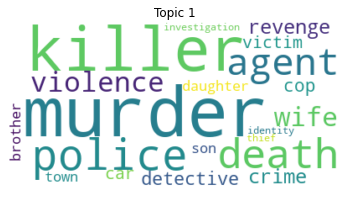

[('wife', 69), ('parent', 69), ('wedding', 68), ('sister', 64), ('day', 54), ('comedy', 53), ('daughter', 53), ('son', 52), ('couple', 47), ('night', 44), ('death', 41), ('home', 41), ('sex', 40), ('friendship', 40), ('husband', 39), ('way', 38), ('brother', 37), ('marriage', 37), ('thing', 36), ('town', 33)]
{'wife': 69, 'parent': 69, 'wedding': 68, 'sister': 64, 'day': 54, 'comedy': 53, 'daughter': 53, 'son': 52, 'couple': 47, 'night': 44, 'death': 41, 'home': 41, 'sex': 40, 'friendship': 40, 'husband': 39, 'way': 38, 'brother': 37, 'marriage': 37, 'thing': 36, 'town': 33}


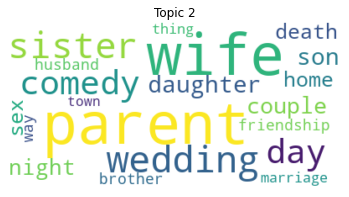

[('school', 136), ('music', 88), ('sex', 77), ('nudity', 69), ('comedy', 52), ('star', 47), ('night', 45), ('band', 40), ('student', 40), ('singer', 40), ('rock', 36), ('party', 36), ('day', 35), ('dance', 34), ('murder', 34), ('brother', 34), ('teen', 34), ('town', 31), ('teacher', 31), ('writer', 30)]
{'school': 136, 'music': 88, 'sex': 77, 'nudity': 69, 'comedy': 52, 'star': 47, 'night': 45, 'band': 40, 'student': 40, 'singer': 40, 'rock': 36, 'party': 36, 'day': 35, 'dance': 34, 'murder': 34, 'brother': 34, 'teen': 34, 'town': 31, 'teacher': 31, 'writer': 30}


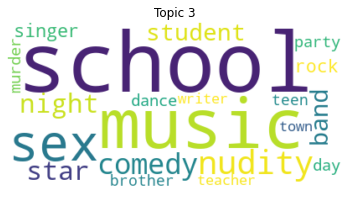

[('war', 106), ('battle', 56), ('vampire', 54), ('soldier', 52), ('death', 51), ('century', 43), ('day', 39), ('hero', 36), ('people', 33), ('force', 33), ('city', 32), ('power', 31), ('town', 31), ('warrior', 31), ('brother', 29), ('legend', 29), ('army', 28), ('group', 27), ('fight', 26), ('journey', 25)]
{'war': 106, 'battle': 56, 'vampire': 54, 'soldier': 52, 'death': 51, 'century': 43, 'day': 39, 'hero': 36, 'people': 33, 'force': 33, 'city': 32, 'power': 31, 'town': 31, 'warrior': 31, 'brother': 29, 'legend': 29, 'army': 28, 'group': 27, 'fight': 26, 'journey': 25}


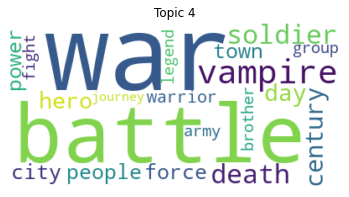

[('drug', 108), ('police', 96), ('cop', 95), ('murder', 76), ('death', 61), ('prison', 59), ('crime', 49), ('gang', 46), ('brother', 45), ('detective', 34), ('law', 33), ('way', 32), ('violence', 32), ('officer', 29), ('daughter', 28), ('drug_dealer', 27), ('art', 27), ('day', 26), ('case', 26), ('night', 25)]
{'drug': 108, 'police': 96, 'cop': 95, 'murder': 76, 'death': 61, 'prison': 59, 'crime': 49, 'gang': 46, 'brother': 45, 'detective': 34, 'law': 33, 'way': 32, 'violence': 32, 'officer': 29, 'daughter': 28, 'drug_dealer': 27, 'art': 27, 'day': 26, 'case': 26, 'night': 25}


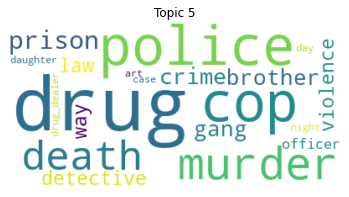

[('space', 145), ('earth', 84), ('planet', 76), ('war', 71), ('power', 63), ('mission', 58), ('robot', 56), ('hero', 55), ('battle', 48), ('superhero', 45), ('dystopia', 44), ('game', 41), ('government', 37), ('scientist', 35), ('team', 35), ('travel', 33), ('crew', 31), ('alien', 31), ('race', 29), ('future', 29)]
{'space': 145, 'earth': 84, 'planet': 76, 'war': 71, 'power': 63, 'mission': 58, 'robot': 56, 'hero': 55, 'battle': 48, 'superhero': 45, 'dystopia': 44, 'game': 41, 'government': 37, 'scientist': 35, 'team': 35, 'travel': 33, 'crew': 31, 'alien': 31, 'race': 29, 'future': 29}


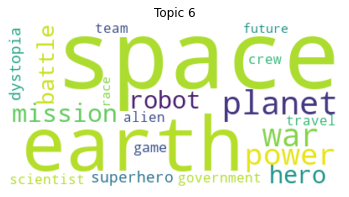

[('agent', 85), ('mission', 53), ('ship', 52), ('team', 49), ('spy', 40), ('war', 39), ('island', 31), ('police', 28), ('car', 28), ('prison', 28), ('adventure', 28), ('death', 28), ('terrorist', 28), ('sea', 26), ('identity', 26), ('action', 25), ('violence', 23), ('weapon', 23), ('escape', 23), ('treasure', 23)]
{'agent': 85, 'mission': 53, 'ship': 52, 'team': 49, 'spy': 40, 'war': 39, 'island': 31, 'police': 28, 'car': 28, 'prison': 28, 'adventure': 28, 'death': 28, 'terrorist': 28, 'sea': 26, 'identity': 26, 'action': 25, 'violence': 23, 'weapon': 23, 'escape': 23, 'treasure': 23}


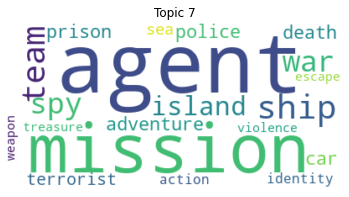

[('animal', 63), ('adventure', 41), ('island', 39), ('witch', 39), ('dog', 35), ('day', 32), ('monster', 32), ('princess', 32), ('land', 31), ('school', 28), ('hero', 28), ('book', 28), ('dream', 27), ('way', 26), ('king', 26), ('creature', 26), ('fantasy', 26), ('magic', 26), ('power', 24), ('town', 24)]
{'animal': 63, 'adventure': 41, 'island': 39, 'witch': 39, 'dog': 35, 'day': 32, 'monster': 32, 'princess': 32, 'land': 31, 'school': 28, 'hero': 28, 'book': 28, 'dream': 27, 'way': 26, 'king': 26, 'creature': 26, 'fantasy': 26, 'magic': 26, 'power': 24, 'town': 24}


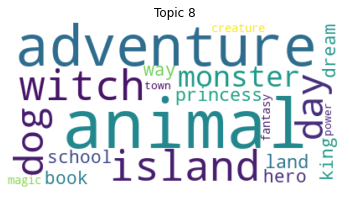

[('brother', 56), ('car', 42), ('daughter', 38), ('gang', 34), ('sport', 28), ('town', 27), ('money', 26), ('way', 25), ('death', 23), ('son', 22), ('wife', 21), ('school', 20), ('journey', 19), ('people', 19), ('loss', 18), ('war', 18), ('hope', 18), ('day', 17), ('race', 17), ('friendship', 17)]
{'brother': 56, 'car': 42, 'daughter': 38, 'gang': 34, 'sport': 28, 'town': 27, 'money': 26, 'way': 25, 'death': 23, 'son': 22, 'wife': 21, 'school': 20, 'journey': 19, 'people': 19, 'loss': 18, 'war': 18, 'hope': 18, 'day': 17, 'race': 17, 'friendship': 17}


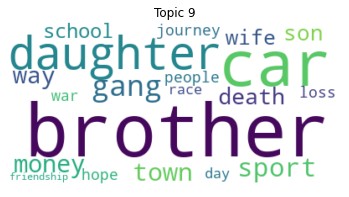

[('school', 72), ('sport', 66), ('team', 50), ('coach', 30), ('job', 30), ('dream', 28), ('college', 26), ('biography', 26), ('game', 25), ('teacher', 24), ('business', 24), ('football', 24), ('player', 22), ('baseball', 22), ('day', 21), ('son', 21), ('company', 21), ('town', 19), ('basketball', 19), ('thing', 18)]
{'school': 72, 'sport': 66, 'team': 50, 'coach': 30, 'job': 30, 'dream': 28, 'college': 26, 'biography': 26, 'game': 25, 'teacher': 24, 'business': 24, 'football': 24, 'player': 22, 'baseball': 22, 'day': 21, 'son': 21, 'company': 21, 'town': 19, 'basketball': 19, 'thing': 18}


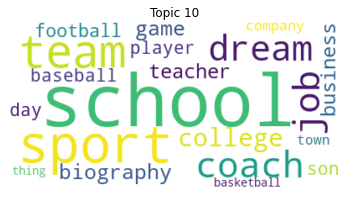

In [90]:
import matplotlib.pyplot as plt
i = 0
for cluster in top_index:
    #print(cluster)
    sort_dicts =sorted(mgp.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:20]
    print(sort_dicts)
    create_wordcloud_1(sort_dicts, topic=i)
    i = i+1

In [91]:
# Save the model
import pickle

# Assuming you have a trained GSDMM model stored in 'model' variable
model = mgp  # Your trained GSDMM model

# Save the model to a file
filename = 'gsdmm_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

In [92]:
# Load the saved model from file
#with open(filename, 'rb') as file:
    #loaded_model = pickle.load(file)

In [107]:
#df_topics = pd.DataFrame({'Topic': gsdmm_topics})
# Get the topic assignments for each data point
# I don`t rename the clusters

topic_dict = {}
topic_names = ['Topic 1',
               'Topic 2',
               'Topic 3',
               'Topic 4',
               'Topic 5',
               'Topic 6',
               'Topic 7',
               'Topic 8',
               'Topic 9',
               'Topic 10'
              ]

for i, topic_num in enumerate(top_index):
    topic_dict[topic_num]=topic_names[i] 

topic_dict

{0: 'Topic 1',
 6: 'Topic 2',
 3: 'Topic 3',
 8: 'Topic 4',
 7: 'Topic 5',
 5: 'Topic 6',
 9: 'Topic 7',
 2: 'Topic 8',
 4: 'Topic 9',
 1: 'Topic 10'}

In [108]:
def create_topics_dataframe(data_text=train_df.text_processed,  mgp=mgp, threshold=0.3, topic_dict=topic_dict, lemma_text=data_words_nostop):
    result = pd.DataFrame(columns=['Text', 'Topic'])
    for i, text in enumerate(data_text):
        result.at[i, 'Text'] = text
        prob = mgp.choose_best_label(data_words_nostop[i])
        if prob[1] >= threshold:
            result.at[i, 'Topic'] = topic_dict[prob[0]]
        else:
            result.at[i, 'Topic'] = 'Other'
    return result

In [109]:
train_df_topics = create_topics_dataframe(data_text=train_df.text_processed,  mgp=mgp, threshold=0.3, topic_dict=topic_dict, lemma_text=data_words_nostop)
train_df_topics

,Text,Topic
0,body doubleafter losing an acting role and his...,Topic 3
1,predatordutch and his group of commandos are h...,Topic 7
2,"the hurricanethe story of rubin ""hurricane"" ca...",Topic 9
3,maypsychological horror about a lonely young w...,Topic 1
4,confidential assignmentwhen a crime organizati...,Topic 1
...,...,...
3387,paris texasa man wanders out of the desert not...,Topic 4
3388,amistadin 1839 the slave ship amistad set sail...,Topic 4
3389,brooklynin 1950s ireland and new york young el...,Topic 3
3390,nighthawksan international terrorist has new y...,Topic 7


In [110]:
train_df = pd.merge(train_df,train_df_topics, how='left', left_on='text_processed', right_on='Text')
train_df

,Unnamed: 0,id,overview,release_date,runtime,tagline,title,vote_average,vote_count,budget_adj,...,quarter_3,quarter_4,total_popular_cast,top_director,keywords,keywords_names,text_concat,text_processed,Text,Topic
0,1882,11507,After losing an acting role and his girlfriend...,1984-10-25,114.0,You can't believe everything you see.,Body Double,6.4,138.0,5.208150e+07,...,0.0,1.0,0,1,"[{'id': 293, 'name': 'female nudity'}, {'id': ...","female nudity, pornography, claustrophobia, nu...",Body DoubleAfter losing an acting role and his...,body doubleafter losing an acting role and his...,body doubleafter losing an acting role and his...,Topic 3
1,1017,106,Dutch and his group of commandos are hired by ...,1987-06-11,107.0,"If it bleeds, we can kill it...",Predator,7.3,2129.0,7.849182e+07,...,0.0,0.0,1,1,"[{'id': 1291, 'name': 'central and south ameri...","central and south america, predator, alien, st...",PredatorDutch and his group of commandos are h...,predatordutch and his group of commandos are h...,predatordutch and his group of commandos are h...,Topic 7
2,927,10400,"The story of Rubin ""Hurricane"" Carter, a boxer...",1999-09-17,146.0,His greatest fight was for justice.,The Hurricane,7.2,401.0,9.570920e+07,...,1.0,0.0,0,0,"[{'id': 378, 'name': 'prison'}, {'id': 2792, '...","prison, boxer, boxing match, boxing school, bi...","The HurricaneThe story of Rubin ""Hurricane"" Ca...","the hurricanethe story of rubin ""hurricane"" ca...","the hurricanethe story of rubin ""hurricane"" ca...",Topic 9
3,1614,10894,Psychological horror about a lonely young woma...,2002-01-13,93.0,Be Careful... She Just Might Take Your Heart.,May,6.3,153.0,8.659342e+05,...,0.0,0.0,0,0,"[{'id': 2467, 'name': 'difficult childhood'}, ...","difficult childhood, psychoterror, murder, lon...",MayPsychological horror about a lonely young w...,maypsychological horror about a lonely young w...,maypsychological horror about a lonely young w...,Topic 1
4,4833,434119,When a crime organization from North Korea cro...,2017-01-18,125.0,NaN,Confidential Assignment,6.2,5.0,8.727888e+06,...,0.0,0.0,0,0,[],,Confidential AssignmentWhen a crime organizati...,confidential assignmentwhen a crime organizati...,confidential assignmentwhen a crime organizati...,Topic 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,357,655,A man wanders out of the desert not knowing wh...,1984-05-19,147.0,A place for dreams. A place for heartbreak. A ...,"Paris, Texas",7.7,282.0,9.098450e+06,...,0.0,0.0,0,0,"[{'id': 380, 'name': 'brother brother relation...","brother brother relationship, regret, texas, p...","Paris, TexasA man wanders out of the desert no...",paris texasa man wanders out of the desert not...,paris texasa man wanders out of the desert not...,Topic 4
3388,470,11831,"In 1839, the slave ship Amistad set sail from ...",1997-12-03,155.0,Freedom is not given. It is our right at birth...,Amistad,6.8,324.0,7.462679e+07,...,0.0,1.0,0,1,"[{'id': 701, 'name': 'cuba'}, {'id': 1860, 'na...","cuba, mutiny, slavery, sentence, historical fi...","AmistadIn 1839, the slave ship Amistad set sai...",amistadin 1839 the slave ship amistad set sail...,amistadin 1839 the slave ship amistad set sail...,Topic 4
3389,4148,167073,"In 1950s Ireland and New York, young Ellis Lac...",2015-10-20,111.0,"Two countries, two loves, one heart",Brooklyn,7.2,1235.0,1.169366e+07,...,0.0,1.0,0,0,"[{'id': 128, 'name': 'love triangle'}, {'id': ...","love triangle, based on novel, homesickness, v...","BrooklynIn 1950s Ireland and New York, young E...",brooklynin 1950s ireland and new york young el...,brooklynin 1950s ireland and new york young el...,Topic 3
3390,884,21610,An international terrorist has New York in a g...,1981-03-17,99.0,A terrorist holds New York in a grip of fear -...,Nighthawks,6.4,87.0,3.371079e+07,...,0.0,0.0,0,0,[],,NighthawksAn international terrorist has New Y...,nighthawksan international terrorist has new y...,nighthawksan international terrorist has new y..

In [143]:
df_train_clean = train_df[train_df['Topic']!="Other"]

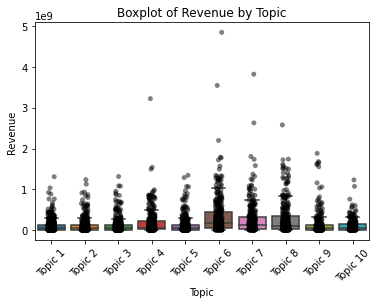

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df_train' is your DataFrame containing the data

# Define the desired sorting order for the 'Topic' column
topic_order = ['Topic 1', 'Topic 2', 'Topic 3','Topic 4','Topic 5','Topic 6','Topic 7','Topic 8','Topic 9','Topic 10']  # Replace with your actual topic names

# Set the figure size
plt.figure(figsize=(6, 4))

# Use seaborn's boxplot function and enable showing individual data points
sns.boxplot(x=df_train_clean['Topic'], y=df_train_clean['revenue_adj'], showfliers=False, order=topic_order)
sns.stripplot(x=df_train_clean['Topic'], y=df_train_clean['revenue_adj'], color='black', alpha=0.5, order=topic_order)

# Set labels and title
plt.xlabel('Topic')
plt.ylabel('Revenue')
plt.title('Boxplot of Revenue by Topic')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [111]:
train_df.to_csv('train_dataframe_topics_final.csv') 

# Preprocess and Topic modeling labels for test dataset

In [5]:
# Read the CSV file
test_df = pd.read_csv(r"data/topic_model_test.csv")
test_df

,Unnamed: 0,id,overview,release_date,runtime,tagline,title,vote_average,vote_count,budget_adj,...,Italy,Russia,Japan,Other Country,quarter_1,quarter_2,quarter_3,quarter_4,total_popular_cast,top_director
0,496,12238.0,Two investigative reporters for a tabloid maga...,1997-04-30,93.0,Never believe what you publish...Never publish...,The Night Flier,5.7,60.0,2.072966e+06,...,1,0,0,1,0.0,1.0,0.0,0.0,0,0
1,830,10307.0,A young woman with no strong religious beliefs...,1999-09-10,103.0,The messenger must be silenced.,Stigmata,6.0,248.0,5.551134e+07,...,0,0,0,1,0.0,0.0,1.0,0.0,0,0
2,2445,9828.0,Five men wake up in a locked-down warehouse wi...,2006-11-03,98.0,NaN,Unknown,6.4,116.0,5.534480e+06,...,0,0,0,1,0.0,0.0,0.0,1.0,0,0
3,4163,252838.0,Doug Harris is a loveable but socially awkward...,2015-01-16,101.0,He's the best man... money can buy.,The Wedding Ringer,6.5,632.0,2.445039e+07,...,0,0,0,1,1.0,0.0,0.0,0.0,1,0
4,1673,170.0,Twenty-eight days after a killer virus was acc...,2002-10-31,113.0,His fear began when he woke up alone. His terr...,28 Days Later,7.1,1816.0,8.659342e+06,...,0,0,0,1,0.0,0.0,0.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,4387,318917.0,Adolf Hitler wakes up in a vacant lot in Berli...,2015-10-08,116.0,NaN,Look Who's Back,6.8,462.0,3.398201e+06,...,0,0,0,1,0.0,0.0,0.0,1.0,0,0
1451,3288,51497.0,Former cop Brian O'Conner partners with ex-con...,2011-04-20,130.0,Get the Fifth Gear.,Fast Five,7.1,2491.0,1.468448e+08,...,0,0,0,1,0.0,1.0,0.0,0.0,2,0
1452,4096,207703.0,The story of a super-secret spy organization t...,2015-01-29,130.0,Manners maketh man.,Kingsman: The Secret Service,7.6,6069.0,8.610788e+07,...,0,0,0,1,1.0,0.0,0.0,0.0,0,0
1453,1583,9932.0,The mafia's Paul Vitti is back in prison and w...,2002-12-06,96.0,Back in therapy,Analyze That,5.7,385.0,1.039121e+08,...,0,0,0,1,0.0,0.0,0.0,1.0,1,0


In [113]:
test_df['id'] = test_df['id'].astype(int).astype(str)
test_df

,Unnamed: 0,id,overview,release_date,runtime,tagline,title,vote_average,vote_count,budget_adj,...,Italy,Russia,Japan,Other Country,quarter_1,quarter_2,quarter_3,quarter_4,total_popular_cast,top_director
0,496,12238,Two investigative reporters for a tabloid maga...,1997-04-30,93.0,Never believe what you publish...Never publish...,The Night Flier,5.7,60.0,2.072966e+06,...,1,0,0,1,0.0,1.0,0.0,0.0,0,0
1,830,10307,A young woman with no strong religious beliefs...,1999-09-10,103.0,The messenger must be silenced.,Stigmata,6.0,248.0,5.551134e+07,...,0,0,0,1,0.0,0.0,1.0,0.0,0,0
2,2445,9828,Five men wake up in a locked-down warehouse wi...,2006-11-03,98.0,NaN,Unknown,6.4,116.0,5.534480e+06,...,0,0,0,1,0.0,0.0,0.0,1.0,0,0
3,4163,252838,Doug Harris is a loveable but socially awkward...,2015-01-16,101.0,He's the best man... money can buy.,The Wedding Ringer,6.5,632.0,2.445039e+07,...,0,0,0,1,1.0,0.0,0.0,0.0,1,0
4,1673,170,Twenty-eight days after a killer virus was acc...,2002-10-31,113.0,His fear began when he woke up alone. His terr...,28 Days Later,7.1,1816.0,8.659342e+06,...,0,0,0,1,0.0,0.0,0.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,4387,318917,Adolf Hitler wakes up in a vacant lot in Berli...,2015-10-08,116.0,NaN,Look Who's Back,6.8,462.0,3.398201e+06,...,0,0,0,1,0.0,0.0,0.0,1.0,0,0
1451,3288,51497,Former cop Brian O'Conner partners with ex-con...,2011-04-20,130.0,Get the Fifth Gear.,Fast Five,7.1,2491.0,1.468448e+08,...,0,0,0,1,0.0,1.0,0.0,0.0,2,0
1452,4096,207703,The story of a super-secret spy organization t...,2015-01-29,130.0,Manners maketh man.,Kingsman: The Secret Service,7.6,6069.0,8.610788e+07,...,0,0,0,1,1.0,0.0,0.0,0.0,0,0
1453,1583,9932,The mafia's Paul Vitti is back in prison and w...,2002-12-06,96.0,Back in therapy,Analyze That,5.7,385.0,1.039121e+08,...,0,0,0,1,0.0,0.0,0.0,1.0,1,0


In [114]:
test_df = pd.merge(test_df,df_movies_keywords, how='left', left_on='id', right_on='id')
test_df

,Unnamed: 0,id,overview,release_date,runtime,tagline,title,vote_average,vote_count,budget_adj,...,Russia,Japan,Other Country,quarter_1,quarter_2,quarter_3,quarter_4,total_popular_cast,top_director,keywords
0,496,12238,Two investigative reporters for a tabloid maga...,1997-04-30,93.0,Never believe what you publish...Never publish...,The Night Flier,5.7,60.0,2.072966e+06,...,0,0,1,0.0,1.0,0.0,0.0,0,0,"[{'id': 736, 'name': 'journalist'}, {'id': 822..."
1,830,10307,A young woman with no strong religious beliefs...,1999-09-10,103.0,The messenger must be silenced.,Stigmata,6.0,248.0,5.551134e+07,...,0,0,1,0.0,0.0,1.0,0.0,0,0,"[{'id': 716, 'name': 'vatican'}, {'id': 2618, ..."
2,2445,9828,Five men wake up in a locked-down warehouse wi...,2006-11-03,98.0,NaN,Unknown,6.4,116.0,5.534480e+06,...,0,0,1,0.0,0.0,0.0,1.0,0,0,"[{'id': 1336, 'name': 'ransom'}, {'id': 1382, ..."
3,4163,252838,Doug Harris is a loveable but socially awkward...,2015-01-16,101.0,He's the best man... money can buy.,The Wedding Ringer,6.5,632.0,2.445039e+07,...,0,0,1,1.0,0.0,0.0,0.0,1,0,"[{'id': 3230, 'name': 'male friendship'}, {'id..."
4,1673,170,Twenty-eight days after a killer virus was acc...,2002-10-31,113.0,His fear began when he woke up alone. His terr...,28 Days Later,7.1,1816.0,8.659342e+06,...,0,0,1,0.0,0.0,0.0,1.0,0,1,"[{'id': 212, 'name': 'london england'}, {'id':..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,4387,318917,Adolf Hitler wakes up in a vacant lot in Berli...,2015-10-08,116.0,NaN,Look Who's Back,6.8,462.0,3.398201e+06,...,0,0,1,0.0,0.0,0.0,1.0,0,0,[]
1451,3288,51497,Former cop Brian O'Conner partners with ex-con...,2011-04-20,130.0,Get the Fifth Gear.,Fast Five,7.1,2491.0,1.468448e+08,...,0,0,1,0.0,1.0,0.0,0.0,2,0,"[{'id': 1161, 'name': 'brazil'}, {'id': 1812, ..."
1452,4096,207703,The story of a super-secret spy organization t...,2015-01-29,130.0,Manners maketh man.,Kingsman: The Secret Service,7.6,6069.0,8.610788e+07,...,0,0,1,1.0,0.0,0.0,0.0,0,0,"[{'id': 470, 'name': 'spy'}, {'id': 1025, 'nam..."
1453,1583,9932,The mafia's Paul Vitti is back in prison and w...,2002-12-06,96.0,Back in therapy,Analyze That,5.7,385.0,1.039121e+08,...,0,0,1,0.0,0.0,0.0,1.0,1,0,"[{'id': 378, 'name': 'prison'}, {'id': 1321, '..."


In [115]:
# Extract the 'name' values from the strings
test_df['keywords_names'] = test_df['keywords'].astype(str).apply(lambda x: [entry.split(":")[1].strip().strip("'").rstrip("'}") for entry in x.strip("[]").split(",") if "'name':" in entry])

test_df['keywords_names'] = test_df['keywords_names'].apply(lambda x: ', '.join(x))

test_df['text_concat'] = test_df['title'].fillna('') + test_df['overview'].fillna('') + test_df['tagline'].fillna('') + " " + test_df['keywords_names'].fillna('')
test_df

,Unnamed: 0,id,overview,release_date,runtime,tagline,title,vote_average,vote_count,budget_adj,...,Other Country,quarter_1,quarter_2,quarter_3,quarter_4,total_popular_cast,top_director,keywords,keywords_names,text_concat
0,496,12238,Two investigative reporters for a tabloid maga...,1997-04-30,93.0,Never believe what you publish...Never publish...,The Night Flier,5.7,60.0,2.072966e+06,...,1,0.0,1.0,0.0,0.0,0,0,"[{'id': 736, 'name': 'journalist'}, {'id': 822...","journalist, airport, vampire, airplane, undead...",The Night FlierTwo investigative reporters for...
1,830,10307,A young woman with no strong religious beliefs...,1999-09-10,103.0,The messenger must be silenced.,Stigmata,6.0,248.0,5.551134e+07,...,1,0.0,0.0,1.0,0.0,0,0,"[{'id': 716, 'name': 'vatican'}, {'id': 2618, ...","vatican, miracle, christian, faith, clergyman,...",StigmataA young woman with no strong religious...
2,2445,9828,Five men wake up in a locked-down warehouse wi...,2006-11-03,98.0,NaN,Unknown,6.4,116.0,5.534480e+06,...,1,0.0,0.0,0.0,1.0,0,0,"[{'id': 1336, 'name': 'ransom'}, {'id': 1382, ...","ransom, factory, amnesia, kidnapping, men, pol...",UnknownFive men wake up in a locked-down wareh...
3,4163,252838,Doug Harris is a loveable but socially awkward...,2015-01-16,101.0,He's the best man... money can buy.,The Wedding Ringer,6.5,632.0,2.445039e+07,...,1,1.0,0.0,0.0,0.0,1,0,"[{'id': 3230, 'name': 'male friendship'}, {'id...","male friendship, impersonator, wedding, lying,...",The Wedding RingerDoug Harris is a loveable bu...
4,1673,170,Twenty-eight days after a killer virus was acc...,2002-10-31,113.0,His fear began when he woke up alone. His terr...,28 Days Later,7.1,1816.0,8.659342e+06,...,1,0.0,0.0,0.0,1.0,0,1,"[{'id': 212, 'name': 'london england'}, {'id':...","london england, taxi, manchester city, submach...",28 Days LaterTwenty-eight days after a killer ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,4387,318917,Adolf Hitler wakes up in a vacant lot in Berli...,2015-10-08,116.0,NaN,Look Who's Back,6.8,462.0,3.398201e+06,...,1,0.0,0.0,0.0,1.0,0,0,[],,Look Who's BackAdolf Hitler wakes up in a vaca...
1451,3288,51497,Former cop Brian O'Conner partners with ex-con...,2011-04-20,130.0,Get the Fifth Gear.,Fast Five,7.1,2491.0,1.468448e+08,...,1,0.0,1.0,0.0,0.0,2,0,"[{'id': 1161, 'name': 'brazil'}, {'id': 1812, ...","brazil, fbi, freedom, escape from prison, car ...",Fast FiveFormer cop Brian O'Conner partners wi...
1452,4096,207703,The story of a super-secret spy organization t...,2015-01-29,130.0,Manners maketh man.,Kingsman: The Secret Service,7.6,6069.0,8.610788e+07,...,1,1.0,0.0,0.0,0.0,0,0,"[{'id': 470, 'name': 'spy'}, {'id': 1025, 'nam...","spy, great britain, secret organization, secre...",Kingsman: The Secret ServiceThe story of a sup...
1453,1583,9932,The mafia's Paul Vitti is back in prison and w...,2002-12-06,96.0,Back in therapy,Analyze That,5.7,385.0,1.039121e+08,...,1,0.0,0.0,0.0,1.0,1,0,"[{'id': 378, 'name': 'prison'}, {'id': 1321, '...","prison, gold, therapist, gangster",Analyze ThatThe mafia's Paul Vitti is back in ...


In [116]:
# Load the regular expression library
import re
# Remove punctuation
test_df['text_processed'] = \
test_df['text_concat'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
test_df['text_processed'] = \
test_df['text_processed'].map(lambda x: x.lower())

print(test_df['text_processed'].head(1).values[0])
# Print out the first rows of test_df
test_df['text_processed'].head()

the night fliertwo investigative reporters for a tabloid magazine track down across country "the night flier" a serial killer who travels by private plane stalking victims in rural airports one of the reporters richard dees begins to suspect that "the night flier could perhaps be a vampire"never believe what you publishnever publish what you believe journalist airport vampire airplane undead reporter series of murders female corpse tabloid reporter


0    the night fliertwo investigative reporters for...
1    stigmataa young woman with no strong religious...
2    unknownfive men wake up in a locked-down wareh...
3    the wedding ringerdoug harris is a loveable bu...
4    28 days latertwenty-eight days after a killer ...
Name: text_processed, dtype: object

In [117]:
data = test_df.text_processed.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[0])

data_lemmatized = lemmatization(data_words)

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_lemmatized, min_count=5, threshold=100)
#trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
#trigram_mod = gensim.models.phrases.Phraser(trigram)
print(bigram_mod[data_lemmatized[0]])

# Form Bigrams
data_words_bigrams = make_bigrams(data_lemmatized)
data_words_bigrams

# remove stop words
data_words_nostop = remove_stopwords(data_words_bigrams)
data_words_nostop

# Create Dictionary
id2word = corpora.Dictionary(data_words_nostop)
# Create Corpus
texts = data_words_nostop
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

['the', 'night', 'fliertwo', 'investigative', 'reporters', 'for', 'tabloid', 'magazine', 'track', 'down', 'across', 'country', 'the', 'night', 'flier', 'serial', 'killer', 'who', 'travels', 'by', 'private', 'plane', 'stalking', 'victims', 'in', 'rural', 'airports', 'one', 'of', 'the', 'reporters', 'richard', 'dees', 'begins', 'to', 'suspect', 'that', 'the', 'night', 'flier', 'could', 'perhaps', 'be', 'vampire', 'never', 'believe', 'what', 'you', 'publishnever', 'publish', 'what', 'you', 'believe', 'journalist', 'airport', 'vampire', 'airplane', 'undead', 'reporter', 'series', 'of', 'murders', 'female', 'corpse', 'tabloid', 'reporter']
['night', 'reporter', 'magazine', 'track', 'country', 'night', 'flier', 'killer', 'plane', 'victim', 'airport', 'reporter', 'night', 'flier', 'publishnever', 'airplane', 'undead', 'reporter', 'series', 'murder', 'corpse', 'tabloid', 'reporter']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 3), (9, 1), (10, 1), (11, 4), (12, 1), (13,

In [118]:
test_df_topics = create_topics_dataframe(data_text=test_df.text_processed,  mgp=mgp, threshold=0.3, topic_dict=topic_dict, lemma_text=data_words_nostop)
test_df_topics

,Text,Topic
0,the night fliertwo investigative reporters for...,Topic 1
1,stigmataa young woman with no strong religious...,Topic 10
2,unknownfive men wake up in a locked-down wareh...,Topic 1
3,the wedding ringerdoug harris is a loveable bu...,Topic 2
4,28 days latertwenty-eight days after a killer ...,Topic 4
...,...,...
1450,look who's backadolf hitler wakes up in a vaca...,Topic 9
1451,fast fiveformer cop brian o'conner partners wi...,Topic 7
1452,kingsman: the secret servicethe story of a sup...,Topic 6
1453,analyze thatthe mafia's paul vitti is back in ...,Topic 5


In [119]:
test_df = pd.merge(test_df,test_df_topics, how='left', left_on='text_processed', right_on='Text')
test_df

,Unnamed: 0,id,overview,release_date,runtime,tagline,title,vote_average,vote_count,budget_adj,...,quarter_3,quarter_4,total_popular_cast,top_director,keywords,keywords_names,text_concat,text_processed,Text,Topic
0,496,12238,Two investigative reporters for a tabloid maga...,1997-04-30,93.0,Never believe what you publish...Never publish...,The Night Flier,5.7,60.0,2.072966e+06,...,0.0,0.0,0,0,"[{'id': 736, 'name': 'journalist'}, {'id': 822...","journalist, airport, vampire, airplane, undead...",The Night FlierTwo investigative reporters for...,the night fliertwo investigative reporters for...,the night fliertwo investigative reporters for...,Topic 1
1,830,10307,A young woman with no strong religious beliefs...,1999-09-10,103.0,The messenger must be silenced.,Stigmata,6.0,248.0,5.551134e+07,...,1.0,0.0,0,0,"[{'id': 716, 'name': 'vatican'}, {'id': 2618, ...","vatican, miracle, christian, faith, clergyman,...",StigmataA young woman with no strong religious...,stigmataa young woman with no strong religious...,stigmataa young woman with no strong religious...,Topic 10
2,2445,9828,Five men wake up in a locked-down warehouse wi...,2006-11-03,98.0,NaN,Unknown,6.4,116.0,5.534480e+06,...,0.0,1.0,0,0,"[{'id': 1336, 'name': 'ransom'}, {'id': 1382, ...","ransom, factory, amnesia, kidnapping, men, pol...",UnknownFive men wake up in a locked-down wareh...,unknownfive men wake up in a locked-down wareh...,unknownfive men wake up in a locked-down wareh...,Topic 1
3,4163,252838,Doug Harris is a loveable but socially awkward...,2015-01-16,101.0,He's the best man... money can buy.,The Wedding Ringer,6.5,632.0,2.445039e+07,...,0.0,0.0,1,0,"[{'id': 3230, 'name': 'male friendship'}, {'id...","male friendship, impersonator, wedding, lying,...",The Wedding RingerDoug Harris is a loveable bu...,the wedding ringerdoug harris is a loveable bu...,the wedding ringerdoug harris is a loveable bu...,Topic 2
4,1673,170,Twenty-eight days after a killer virus was acc...,2002-10-31,113.0,His fear began when he woke up alone. His terr...,28 Days Later,7.1,1816.0,8.659342e+06,...,0.0,1.0,0,1,"[{'id': 212, 'name': 'london england'}, {'id':...","london england, taxi, manchester city, submach...",28 Days LaterTwenty-eight days after a killer ...,28 days latertwenty-eight days after a killer ...,28 days latertwenty-eight days after a killer ...,Topic 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,4387,318917,Adolf Hitler wakes up in a vacant lot in Berli...,2015-10-08,116.0,NaN,Look Who's Back,6.8,462.0,3.398201e+06,...,0.0,1.0,0,0,[],,Look Who's BackAdolf Hitler wakes up in a vaca...,look who's backadolf hitler wakes up in a vaca...,look who's backadolf hitler wakes up in a vaca...,Topic 9
1451,3288,51497,Former cop Brian O'Conner partners with ex-con...,2011-04-20,130.0,Get the Fifth Gear.,Fast Five,7.1,2491.0,1.468448e+08,...,0.0,0.0,2,0,"[{'id': 1161, 'name': 'brazil'}, {'id': 1812, ...","brazil, fbi, freedom, escape from prison, car ...",Fast FiveFormer cop Brian O'Conner partners wi...,fast fiveformer cop brian o'conner partners wi...,fast fiveformer cop brian o'conner partners wi...,Topic 7
1452,4096,207703,The story of a super-secret spy organization t...,2015-01-29,130.0,Manners maketh man.,Kingsman: The Secret Service,7.6,6069.0,8.610788e+07,...,0.0,0.0,0,0,"[{'id': 470, 'name': 'spy'}, {'id': 1025, 'nam...","spy, great britain, secret organization, secre...",Kingsman: The Secret ServiceThe story of a sup...,kingsman: the secret servicethe story of a sup...,kingsman: the secret servicethe story of a sup...,Topic 6
1453,1583,9932,The mafia's Paul Vitti is back in prison and w...,2002-12-06,96.0,Back in therapy,Analyze That,5.7,385.0,1.039121e+08,...,0.0,1.0,1,0,"[{'id': 378, 'name': 'prison'}, {'id': 1321, '...","prison, gold, therapist, gangster",Analyze ThatThe mafia's Paul Vitti is back in ...,analyze thatthe mafia's paul vitti is back in ...,analyze thatthe mafia's paul vitti is back in ...,Topic 5


In [120]:
test_df.to_csv('test_dataframe_topics_final.csv') 

# LDA Topic Model

In [166]:
from gensim.models import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for n in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [167]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words_nostop, start=1, limit=21, step=1)

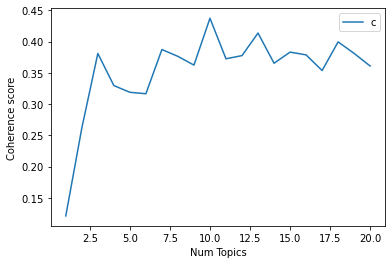

In [168]:
# Visulize the coherence score vs.the number of topics
start=1
limit=21
step=1
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [162]:
from gensim.models import CoherenceModel
def compute_perplexity_values(dictionary, corpus, texts, limit, start, step):
    perplexity_values = []
    model_list = []
    for n in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        perplexity_values.append(model.log_perplexity(corpus))

    return model_list, perplexity_values

In [163]:
model_list, perplexity_values = compute_perplexity_values(dictionary=id2word, corpus=corpus, texts=data_words_nostop, start=1, limit=21, step=1)

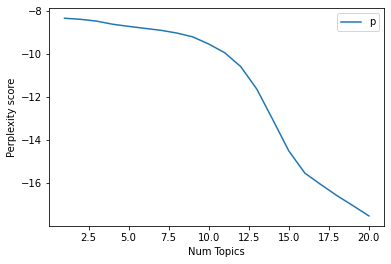

In [164]:
# Visulize the coherence score vs.the number of topics
start=1
limit=21
step=1
x = range(start, limit, step)
plt.plot(x, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

In [131]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"murder" + 0.006*"agent" + 0.005*"wife" + 0.005*"drug" + 0.005*"day" '
  '+ 0.005*"battle" + 0.004*"daughter" + 0.004*"vampire" + 0.004*"sex" + '
  '0.004*"killer"'),
 (1,
  '0.007*"son" + 0.006*"death" + 0.006*"daughter" + 0.006*"war" + '
  '0.005*"night" + 0.005*"space" + 0.004*"way" + 0.004*"day" + 0.003*"parent" '
  '+ 0.003*"city"'),
 (2,
  '0.008*"war" + 0.006*"day" + 0.005*"team" + 0.005*"people" + 0.005*"power" + '
  '0.005*"school" + 0.004*"night" + 0.004*"journey" + 0.004*"daughter" + '
  '0.004*"death"'),
 (3,
  '0.007*"agent" + 0.007*"killer" + 0.006*"murder" + 0.005*"hero" + '
  '0.005*"comedy" + 0.005*"game" + 0.004*"wife" + 0.004*"way" + 0.004*"police" '
  '+ 0.004*"war"'),
 (4,
  '0.008*"death" + 0.006*"school" + 0.006*"town" + 0.006*"computer" + '
  '0.005*"car" + 0.005*"brother" + 0.005*"murder" + 0.005*"day" + 0.004*"team" '
  '+ 0.004*"power"'),
 (5,
  '0.011*"school" + 0.008*"murder" + 0.005*"wife" + 0.005*"death" + '
  '0.005*"town" + 0.004*"sister" 

In [132]:
topic_keywords = []
for topic_id in range(lda_model.num_topics):
    top_words = [word for word, prob in lda_model.show_topic(topic_id, topn=10)]
    topic_keywords.append(top_words)

# Create a Pandas DataFrame from the list of lists
df_topic = pd.DataFrame(topic_keywords, columns=['Keyword 1', 'Keyword 2', 'Keyword 3', 'Keyword 4', 'Keyword 5', 'Keyword 6', 'Keyword 7', 'Keyword 8', 'Keyword 9', 'Keyword 10'])
df_topic.index.name = 'Topic'
df_topic.index += 1

# Print the DataFrame
df_topic

,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10
Topic,,,,,,,,,,
1,murder,agent,wife,drug,day,battle,daughter,vampire,sex,killer
2,son,death,daughter,war,night,space,way,day,parent,city
3,war,day,team,people,power,school,night,journey,daughter,death
4,agent,killer,murder,hero,comedy,game,wife,way,police,war
5,death,school,town,computer,car,brother,murder,day,team,power
6,school,murder,wife,death,town,sister,night,loss,dream,sex
7,prison,murder,brother,way,sister,police,war,revenge,space,town
8,death,police,cop,murder,violence,agent,gang,brother,way,revenge
9,day,killer,city,murder,son,hero,space,mission,war,town


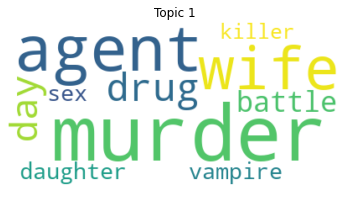

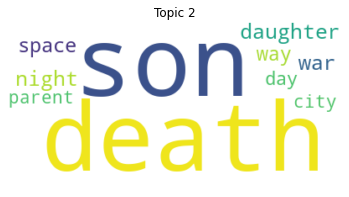

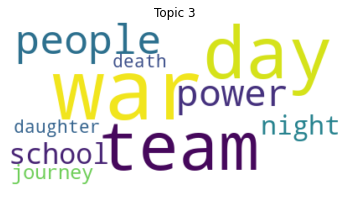

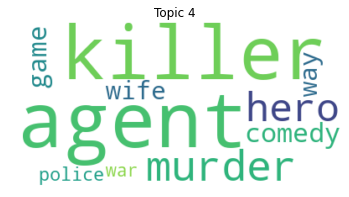

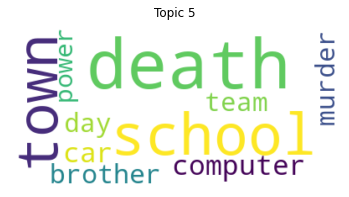

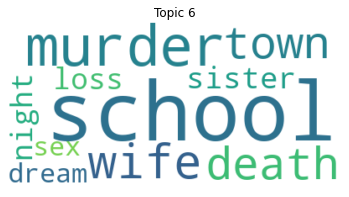

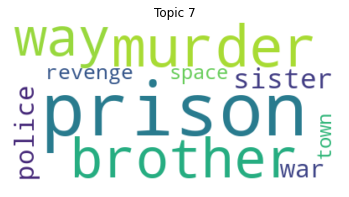

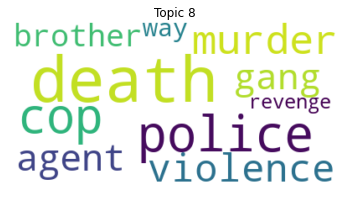

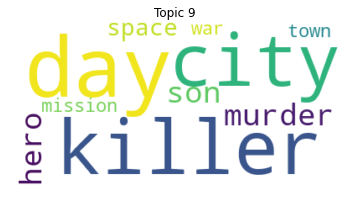

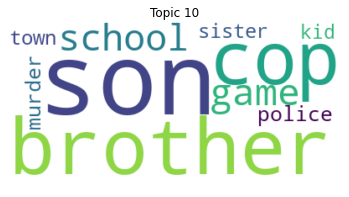

In [135]:
# Import the wordcloud library
from wordcloud import WordCloud


def create_wordcloud(model, topic):
    text = {word: value for word, value in model.show_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic" + " "+ str(topic+1))
    plt.show()
    
for i in range(0,10):
    create_wordcloud(lda_model, topic=i)

In [134]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
#import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline


pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word, sort_topics=True)
vis

D:\Annaconda\Annaconda\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.002253 -0.005652       1        1  12.699860
7      0.026759 -0.018166       2        1  12.181950
2      0.032118  0.024089       3        1  11.664826
1      0.005546  0.071680       4        1  10.279121
8     -0.009067 -0.001477       5        1   9.971189
4      0.051511 -0.029360       6        1   9.866280
3      0.027038 -0.052370       7        1   9.288934
0      0.005387 -0.019747       8        1   8.812269
6     -0.029550  0.072569       9        1   8.549994
9     -0.107488 -0.041567      10        1   6.685576, topic_info=          Term        Freq       Total Category  logprob  loglift
82         son  197.000000  197.000000  Default  30.0000  30.0000
50      prison  127.000000  127.000000  Default  29.0000  29.0000
370        cop  152.000000  152.000000  Default  28.0000  28.0000
481     sister  145.000000  145.000000  Default  27.0000  27.0000
2122  computer   66.000000   66.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
188     killer   10.936626  194.479089  Topic10  -5.9362  -0.1730
131       drug   10.261643  163.628155  Topic10  -6.0000  -0.0640
14        home    9.945841  157.068350  Topic10  -6.0312  -0.0543
72       dream    9.765537  159.892160  Topic10  -6.0495  -0.0904
184        war    9.361620  253.411494  Topic10  -6.0917  -0.5932

[840 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
7776       7  0.774628  abolitionist
660        1  0.148059         abuse
660        2  0.098706         abuse
660        3  0.049353         abuse
660        4  0.296118         abuse
...      ...       ...           ...
9515      10  0.623641          yogi
10501      9  0.795041          zack
4687       5  0.891273        zhenya
9402       2  0.892653           zoe
9524       4  0.792527         zygon

[2651 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 8, 3, 2, 9, 5, 4, 1, 7, 10])

In [165]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_nostop, dictionary=id2word, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.748067255885186

Coherence Score:  -3.492519926470191
